In [308]:
import os
import time
import sys
sys.path.insert(0,'..')
from copy import deepcopy
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from matplotlib import rc
rc('text', usetex=False)

import torch
import torch.nn as nn
from torch.autograd import Variable

%load_ext autoreload
%autoreload 2

from src.data import load_mnist
from src.utils import load_model_net,process_config
from src.analysis import compute_gradient_diversity,\
                        compute_gradients,eval_accuracy
from src.flatness import compute_flatness

from plot import smooth_plot,plot_curve,parse_loss_traj
    
    
def parse_diversity_file(filename):
    with open(filename,'rb') as f:
        data = pickle.load(f)
    
    res = data['traj']
    res = sorted(res,key=lambda t:t['iter'])
    n_iters = [t['iter'] for t in res]
    diversities = [t['info'] for t in res]
    return n_iters,diversities

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
args = process_config('../configs/base.json')
trDL,teDL,net0 = load_model_net(args,root='../data/fashionmnist/',stop=True)
ct = nn.CrossEntropyLoss()

filename_gd = '../experiments/fashionmnist_gd/checkpoint/batchsize_1200_start_0_now_10000_end_45000.ckpt'
filename_sgd = '../experiments/fashionmnist_gd2sgd/checkpoint/batchsize_20_start_3000_now_10000_end_45000.ckpt'

net_gd = deepcopy(net0)
net_gd.load_state_dict(torch.load(filename_gd))

net_sgd = deepcopy(net0)
net_sgd.load_state_dict(torch.load(filename_sgd))

In [314]:
print('SGD',compute_gradient_diversity(net_sgd,ct,trDL.X,trDL.y))
print('GD',compute_gradient_diversity(net_gd,ct,trDL.X,trDL.y))

SGD 617.024711572401
GD 10931.243976080294


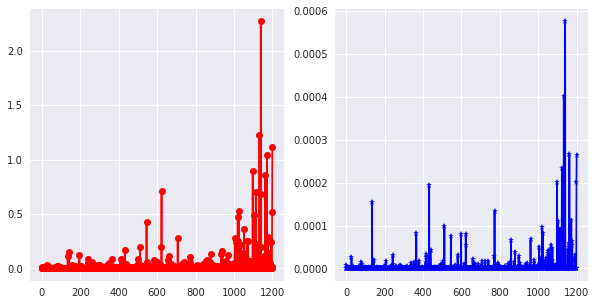

In [173]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.plot(GN_gd.numpy(),'ro-')
plt.subplot(1,2,2); plt.plot(GN_sgd.numpy(),'b*-')

In [262]:
n_iters1, div1 = parse_diveristy_file('../experiments/fashionmnist_gd/diversity.pkl')

n_iters2, div2 = parse_diversity_file('../experiments/fashionmnist_gd2sgd/diversity.pkl')

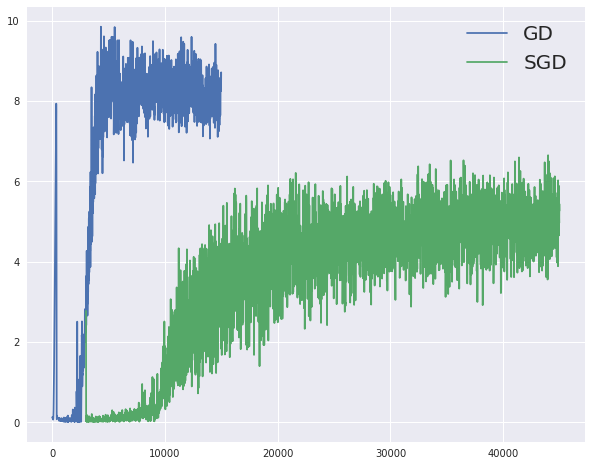

In [264]:
plt.figure(figsize=(10,8))
plt.plot(n_iters1,div1,'-',label='GD')
plt.plot(n_iters2,div2,'-',label='SGD')
# plt.xlim([1000,15000])
plt.legend(fontsize=20)

In [274]:
traj_gd = parse_loss_traj('../experiments/fashionmnist_gd/loss.pkl')
traj_sgd = parse_loss_traj('../experiments/fashionmnist_gd2sgd/loss.pkl')

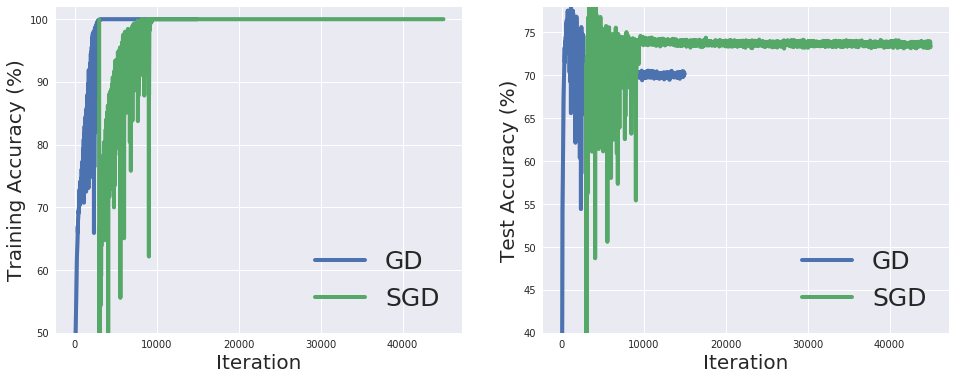

In [275]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1);
plot_curve(curve_list=[(traj_gd[0],traj_gd[2]),
            (traj_sgd[0],traj_sgd[2])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Training Accuracy (%)',
           smooth_width=1,
           lw=4,
#            xlim=[0,15000],
           ylim=[50,102]
        )


plt.subplot(1,2,2); 
plot_curve(curve_list=[(traj_gd[0],traj_gd[4]),
            (traj_sgd[0],traj_sgd[4])], 
           labels=['GD','SGD'],
           xlabel=r'Iteration',
           ylabel=r'Test Accuracy (%)',
           smooth_width=1,
           lw=4,
#            xlim=[0,15000],
           ylim=[40,78]
        )

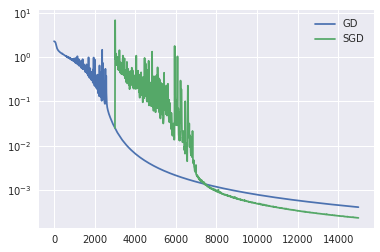

In [154]:
plt.semilogy(traj_gd[0],traj_gd[1],'-',label='GD')
plt.semilogy(traj_sgd[0],traj_sgd[1],'-',label='SGD')
plt.legend()

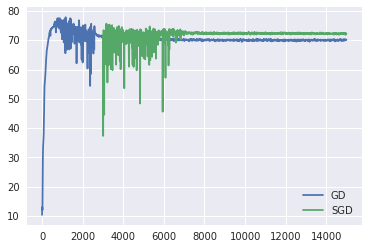

In [162]:
plt.plot(traj_gd[0],traj_gd[4],'-',label='GD')
plt.plot(traj_sgd[0],traj_sgd[4],'-',label='SGD')
plt.legend()
# plt.ylim([0.5,2.5])

In [257]:
flatness = compute_flatness(net_gd,ct,trDL,stddev=0.0001,n_samples=6000)

print(flatness)

2325.7904996475813


192.52789584293959

TypeError: unsupported operand type(s) for -: 'list' and 'float'